In [13]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *
from ctrace.problem import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
G1 = load_graph("montgomery")
G2 = nx.generators.trees.random_tree(len(G1.nodes))

In [75]:
df.compliance_rate.unique()

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

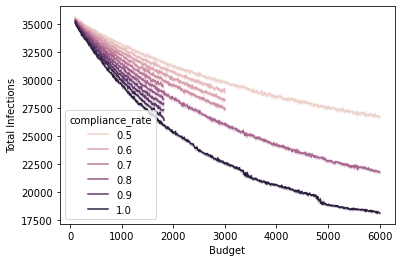

In [74]:
df = pd.read_csv("../output/run_HHunU/results.csv")
#df=df[df.budget<=1810]
#df1 = pd.read_csv("../output/run_GsGsg/results.csv")
df3 = pd.read_csv("../output/run_drdhw/results.csv")
df2 = pd.read_csv("../output/run_ENJfq/results.csv")
df = pd.concat([df3,df[df.compliance_rate==1].reset_index(drop=True),df[df.compliance_rate==.5].reset_index(drop=True),df[df.compliance_rate==.75].reset_index(drop=True),df2]).reset_index(drop=True)
#df['effective_budget'] = df['compliance_rate'] * df['budget']
df = df.sort_values(by='compliance_rate')

sns.lineplot(data=df, x='budget',y='infected_count_known',hue='compliance_rate')
plt.ylabel("Total Infections")
plt.xlabel("Budget")
plt.show()



In [69]:
df1 = df[df.compliance_rate==1]

In [76]:
x=[]
y=[[] for _ in df.compliance_rate.unique()]
df_arr = [df[df.compliance_rate==i].reset_index(drop=True) for i in df.compliance_rate.unique()]

for B in range(100,1001,10):
    
    val = df1[df1.budget==B]['infected_count_real'].mean()
    x.append(B)
    
    for i,rate in enumerate(df.compliance_rate.unique()):
        
        budgets = df_arr[i].budget.unique()
        budgets.sort()
        
        for b in budgets:

            if df_arr[i][df_arr[i].budget==b]['infected_count_real'].mean() <= val:
                y[i].append(b*rate)
                break
                
    

0.5 1.6074215639433027
0.55 1.4867080745341614
0.6 1.3917343526039176
0.65 1.30972049689441
0.7 1.2352619843924189
0.75 1.1869206880076444
0.8 1.1394298455168022
0.85 1.1059611403089664
0.9 1.0634304825609173
0.95 1.0381159420289856
1.0 0.9964644051600573


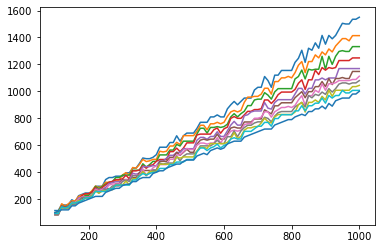

In [77]:
m=[]
n=[]

for i,yi in enumerate(y):
    a,b = np.polyfit(x=x,y=yi,deg=1)
    #print(df.compliance_rate.unique()[i], a)
    m.append(df.compliance_rate.unique()[i])
    n.append(a)
    sns.lineplot(x=x,y=yi)
#sns.lineplot(x=x,y=y1)
#sns.lineplot(x=x,y=y2)
#sns.lineplot(x=x,y=y3)
#sns.lineplot(x=x,y=y4)

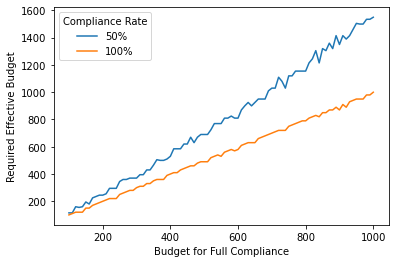

In [86]:
for i,yi in enumerate(y):
    if (df.compliance_rate.unique()[i] == .5) | (df.compliance_rate.unique()[i] == 1):
        sns.lineplot(x=x,y=yi)
        
plt.legend(['50%','100%'],title='Compliance Rate')
plt.ylabel("Required Effective Budget")
plt.xlabel("Budget for Full Compliance")
plt.show()

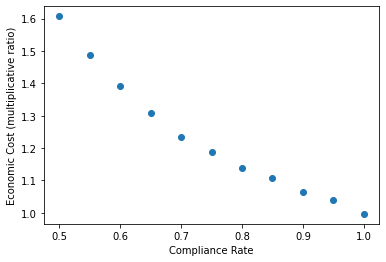

In [79]:
plt.scatter(x=m,y=n)    
plt.xlabel("Compliance Rate")
plt.ylabel("Economic Cost (multiplicative ratio)")
plt.show()

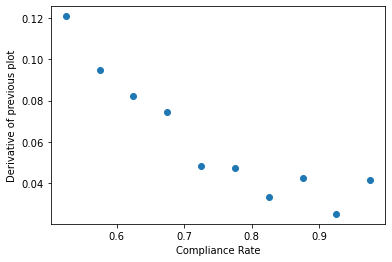

In [91]:
plt.scatter(x=m_prime,y=n_prime)    
plt.xlabel("Compliance Rate")
plt.ylabel("Derivative of previous plot")
plt.show()

In [89]:
n_prime=[]
m_prime=[]

for (i,v) in enumerate(n):
    if(i!=0):
        n_prime.append(n[i-1]-n[i])
        m_prime.append(.5*m[i]+.5*m[i-1])

<AxesSubplot:>

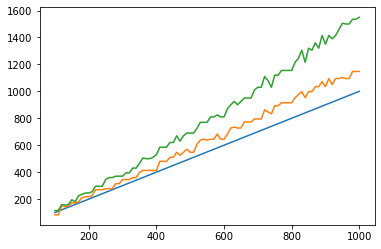

In [11]:
sns.lineplot(x=x,y=y1)
sns.lineplot(x=x,y=y2)
sns.lineplot(x=x,y=y3)
#sns.lineplot(x=x,y=y4)

In [26]:
df2[df2.budget==1000]['infected_count_real'].mean()

31474.6

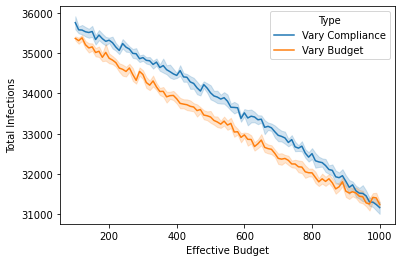

In [17]:
df = pd.read_csv("../output/run_bh8Gt/results.csv")
df1 = pd.read_csv("../output/run_5GQVw/results.csv")
df['Type'] = 'Vary Compliance'
df1['Type'] = 'Vary Budget'

df = pd.concat([df,df1])

df['effective_budget'] = df['compliance_rate'] * df['budget']

sns.lineplot(data=df, x='effective_budget',y='infected_count_known',hue='Type')
plt.ylabel("Total Infections")
plt.xlabel("Effective Budget")
plt.show()

In [3]:
G = load_graph("montgomery")

In [4]:
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)

In [ ]:
#this is how the code is used
for i in [10,100,1000,2000,5000,10000]:
    a = time.time()
    state = SimulationState(G, (S,I,R), (S,I,R), 1000, .078,1,1,1,1)
    agent = SAA_Diffusion

    while len(state.SIR_known.SIR[1]) != 0:
        #print(len(state.SIR_known.SIR[1]))
        to_quarantine = agent(state,num_samples=i)
        state.step(to_quarantine)

        #print(state.SIR_known.V1 == state.SIR_real.V1)
        #print("S :" + str(len(state.SIR_known.SIR.S)) + " " + str(len(state.SIR_real.SIR.S)))
        #print("I :" + str(len(state.SIR_known.SIR.I)) + " " + str(len(state.SIR_real.SIR.I)))
        #print("R :" + str(len(state.SIR_known.SIR.R)) + " " + str(len(state.SIR_real.SIR.R)))

        #print()

        #print(len(set(state.SIR_known.SIR.R).difference(set(state.SIR_real.SIR.R))))
        #print(len(set(state.SIR_real.SIR.R).difference(set(state.SIR_known.SIR.R))))
    print(time.time()-a)
    #print(len(state.SIR_known.SIR[1]))
    #print()
    print(len(state.SIR_known.SIR[2])/75457)
    #print(len(state.SIR_known.SIR[0]),len(state.SIR_real.SIR[0]))

117.56722831726074
0.4040711928648104
1516.4038002490997
0.40552897676822564


In [7]:
problem = MinExposedSAADiffusion(state.SIR_known)

In [28]:
len(state.SIR_real.SIR[0] + state.SIR_real.SIR[1] + state.SIR_real.SIR[2])

75457

In [179]:
agents = [NoIntervention, Random, Degree, DepRound, DegGreedy]

In [180]:
for agent in agents:
    state = SimulationState(G, (S,I,R), (S,I,R), 2000, .078,1,1, 1,1)

    while len(state.SIR_known.SIR[1]) != 0:
        to_quarantine = agent(state)
        state.step(to_quarantine)

    print(agent.__name__ + " " + str(len(state.SIR_known.SIR[2])))


NoIntervention 36169
Random 30674
Degree 24299
DegGreedy 21525
DepRound 23785
